### Ex. 2

Let's calculate FFT for each signal

In [5]:
import matplotlib.pyplot as plt
import numpy as np

N = 88
A = 2
n = np.arange(N)

def generate_s(phase):
    return A * np.sin(2 * np.pi * (n - phase) / N)

ss = [generate_s(phase) for phase in (0, N/4, N/2, 3*N / 4)]
ffts = [np.fft.fft(s) for s in ss]

print(ffts[0][:5])

[ 2.44929360e-16+0.00000000e+00j -1.11060666e-14-8.80000000e+01j
  1.04178112e-15-4.36144914e-15j -2.94838665e-15-4.42206036e-15j
  1.39569290e-15-1.54708238e-15j]


The result contains very small numbers that are side effects of algorithm's approximation, let's round them down.

In [6]:
for fft in ffts:
    fft.real[np.abs(fft.real) < 1e-10] = 0
    fft.imag[np.abs(fft.imag) < 1e-10] = 0
print(ffts[0][:5])

[0. +0.j 0.-88.j 0. +0.j 0. +0.j 0. +0.j]


Now, let's plot their magnitudes and phases. To see plots for other phase shifts, adjust `index` (0..3).

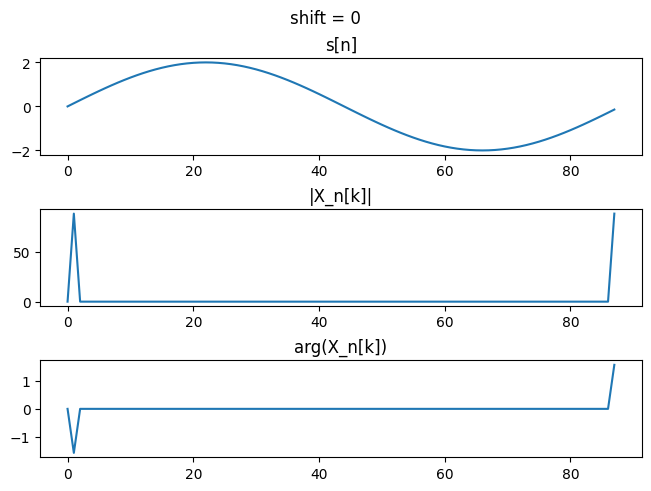

In [10]:
index = 0

ffts_amplitude = np.abs(ffts)
ffts_argument = np.angle(ffts)
fig, (ax1, ax2, ax3) = plt.subplots(3, layout='constrained')
fig.suptitle(f"shift = {index * 22}")
ax1.plot(ss[index])
ax1.set_title("s[n]")
ax2.plot(ffts_amplitude[index])
ax2.set_title("|X_n[k]|")
ax3.plot(ffts_argument[index])
ax3.set_title("arg(X_n[k])")
plt.show()